# Import

In [1]:
from joblib import Parallel, delayed
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 
from os import path
import pandas as pd 
import os
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#os.environ["CUDA_VISIBLE_DEVICES"] = '1'
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
import datetime
import math
import time
import pickle
import random
from scipy.spatial import cKDTree
from sklearn import preprocessing
from sklearn.decomposition import PCA
import sys
from sklearn.metrics import r2_score as r2
#from rdkit import Chem
from sklearn.decomposition import PCA
import rishi_utils as ru

import importlib
import efrc_ml_production as ml
importlib.reload(ml)
importlib.reload(ru)
from skopt import gp_minimize

from multiprocessing import Pool

In [2]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.backend import manual_variable_initialization
manual_variable_initialization(True)
import tensorflow.keras.backend as K
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import LeaveOneOut,KFold

In [3]:
import shap

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
from sklearn.metrics import r2_score

In [6]:
import parityPlot as pp

In [49]:
#df_ffv = ru.pd_load('/data/rgur/efrc/polymer_membrane/fingerprint.csv')
df = ru.pd_load('/data/rgur/g2g/raw_data/huan_1.9k/fp_df.csv')

In [8]:
df.head()

,id,smiles,dft_bandgap,index,afp_Br1_C3_C3,afp_Br1_C4_C4,afp_Br1_C4_H1,afp_C2_C2_C2,afp_C2_C2_C3,afp_C2_C2_C4,...,mfp_MQNs36,mfp_MQNs37,mfp_MQNs38,mfp_MQNs39,mfp_MQNs40,mfp_MQNs41,mfp_MQNs42,mfp_NumAliphaticRings,mfp_NumAromaticRings,mfp_tpsa
0,khz-0002,[*]CC(C1=CC=CC=C1)CC(C2=CC=CC=C2)CC(C3=CC=CC=C...,5.2025,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.000000
1,khz-0008,[*]CCCCCOC(=O)CCCCCOC(=O)[*],6.6614,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.365278
2,khz-0009,[*]CCC(C(F)(F)(F))(C(F)(F)(F))OCCC(C(F)(F)(F))...,7.6175,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.144219
3,khz-0014,[*]CC(=O)OCC(=O)O[*],7.0895,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.095833
4,khz-0017,[*]C(C=C1)=CC=C1SC(C=C2)=CC=C2S[*],3.6211,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000


In [9]:
len(df)

1983

In [10]:
df.columns

Index(['id', 'smiles', 'dft_bandgap', 'index', 'afp_Br1_C3_C3',
       'afp_Br1_C4_C4', 'afp_Br1_C4_H1', 'afp_C2_C2_C2', 'afp_C2_C2_C3',
       'afp_C2_C2_C4',
       ...
       'mfp_MQNs36', 'mfp_MQNs37', 'mfp_MQNs38', 'mfp_MQNs39', 'mfp_MQNs40',
       'mfp_MQNs41', 'mfp_MQNs42', 'mfp_NumAliphaticRings',
       'mfp_NumAromaticRings', 'mfp_tpsa'],
      dtype='object', length=609)

In [11]:
for col in df.columns:
    print(col)

id
smiles
dft_bandgap
index
afp_Br1_C3_C3
afp_Br1_C4_C4
afp_Br1_C4_H1
afp_C2_C2_C2
afp_C2_C2_C3
afp_C2_C2_C4
afp_C2_C2_H1
afp_C2_C2_N3
afp_C2_C2_Si4
afp_C2_C3_C2
afp_C2_C3_C3
afp_C2_C3_H1
afp_C2_C3_N2
afp_C2_C3_N3
afp_C2_C3_S2
afp_C2_C4_C2
afp_C2_C4_C3
afp_C2_C4_C4
afp_C2_C4_Cl1
afp_C2_C4_F1
afp_C2_C4_H1
afp_C2_C4_O2
afp_C2_C4_S2
afp_C2_N3_C3
afp_C2_Si4_C4
afp_C3_C2_N1
afp_C3_C3_C3
afp_C3_C3_C4
afp_C3_C3_Cl1
afp_C3_C3_F1
afp_C3_C3_H1
afp_C3_C3_N2
afp_C3_C3_N3
afp_C3_C3_O1
afp_C3_C3_O2
afp_C3_C3_P4
afp_C3_C3_S1
afp_C3_C3_S2
afp_C3_C3_S4
afp_C3_C3_Si4
afp_C3_C4_C3
afp_C3_C4_C4
afp_C3_C4_Cl1
afp_C3_C4_F1
afp_C3_C4_H1
afp_C3_C4_N3
afp_C3_C4_N4
afp_C3_C4_O2
afp_C3_C4_S2
afp_C3_N2_C3
afp_C3_N2_C4
afp_C3_N2_N2
afp_C3_N2_N3
afp_C3_N3_C3
afp_C3_N3_C4
afp_C3_N3_H1
afp_C3_N3_N2
afp_C3_N3_N3
afp_C3_N3_O1
afp_C3_N3_O2
afp_C3_N3_S2
afp_C3_O2_C3
afp_C3_O2_C4
afp_C3_O2_H1
afp_C3_O2_N3
afp_C3_O2_S4
afp_C3_P4_C3
afp_C3_P4_O1
afp_C3_S2_C3
afp_C3_S2_C4
afp_C3_S2_H1
afp_C3_S2_N3
afp_C3_S2_S2
afp_C3_S4_C3
a

In [10]:
df.dropna(subset=[other_params['col_Y']],axis=0)

NameError: name 'other_params' is not defined

In [ ]:
def inv_r2(y_true, y_pred):
    return -100.0*r2_score(y_true, y_pred)

In [52]:
class DataSet:
    def __init__(self, df_path=None, other_params=None, nn_params=None,track=True,chkpt_name='model_checkpoint',
                 hp=False,df=None):
        self.df_path = df_path
        if hp == False:
            self.df = ru.pd_load(self.df_path)
        else:
            self.df = df
        self.track = track
        self.chkpt_name = chkpt_name
        self.hp = hp
        self.n_samples = len(self.df)
        
        #initialize other_params
        self.other_params = {}
        self.other_params['n_core'] = 1
        self.other_params['col_X'] = ['PG']
        self.other_params['col_split'] = None #column to split folds on
        self.other_params['now'] = ru.add_timestamp('')
        self.other_params['n_folds'] = 10
        self.other_params['hp_n_folds'] = 5
        self.other_params['predefined_splits'] = False
        if self.other_params['predefined_splits'] != False:
            self.other_params['read_from_predefined_splits'] = True
        else:
            self.other_params['read_from_predefined_splits'] = False
        self.other_params['hp_frac'] = 1
        #self.other_params['N_CALLS'] = 20
        self.other_params['training_time'] = 'medium'
        self.other_params['scorer'] = ml.get_rmse #lower is better
        
        #over-write passed in other_params
        for k in other_params.keys():
            self.other_params[k] = other_params[k]
        if 'N_CALLS' not in self.other_params.keys():
            if self.other_params['training_time'] == 'fast':
                self.other_params['N_CALLS'] = 10
            elif self.other_params['training_time'] == 'medium':
                self.other_params['N_CALLS'] = 20
            elif self.other_params['training_time'] == 'long':
                self.other_params['N_CALLS'] = 50
                
        
        #make and change dir
        ru.mkdir_existOk(other_params['experiment_dir'])
        os.chdir(other_params['experiment_dir'])
        
        #make list of some values in other_params
        self.other_params['col_Y'] = list(self.other_params['col_Y'])
        self.other_params['col_X'] = list(self.other_params['col_X'])
        
        #initialize nn_params
        self.nn_params = {}
        self.nn_params['lr'] = (.0005, .01)
        self.nn_params['patience'] = 15
        self.nn_params['n_layers'] = 8
        self.nn_params['bs'] = (2, round(len(self.df)/2))
        self.nn_params['loss'] = 'mse'
        for i in range(self.nn_params['n_layers']):
            exec("self.nn_params['h_%s']=(0,800)" %i)

        #over-write nn_params with user input 
        for k in nn_params.keys():
            self.nn_params[k] = nn_params[k]
        if 'n_units' in nn_params.keys():
            for i in range(self.nn_params['n_layers']):
                exec("self.nn_params['h_%s']=(0,nn_params['n_units'])" %i)            
        
        #get col_X from df
        self.nonpgCols = [col for col in self.other_params['col_X'] if col != 'PG']
        self.pgCols = [col for col in self.df.columns.tolist() if ru.checkSubstrings(['afp','mfp','efp','bfp'],
                                                                                     col)]
        #self.pgCols = [col for col in self.df.columns.tolist() if col[0] != '_' and col != 'index']
        self.other_params['col_X'] = self.nonpgCols + self.pgCols
        
        #enable splitting
        if self.other_params['col_split'] == None:
            self.other_params['col_split'] = '_record_num'
            self.df['_record_num'] = list(range(self.n_samples))
            
        #remove NA from col_Y
        self.df = self.df.dropna(subset=self.other_params['col_Y'])
        
        #print params for tracking purposes
        if self.hp == False:
            print(self.other_params)
            print(self.nn_params)
    def make_splits(self):
        if self.hp==False:
            if self.other_params['predefined_splits'] != False:
                if self.other_params['read_from_predefined_splits'] == True:
                    with open(self.other_params['read_from_predefined_splits'], 'rb') as f:
                        input_file_tracker = pickle.load(f)
        #scale df
#         transformer = RobustScaler()
#         try:
#             unscaled = np.array(self.df.loc[:,self.other_params['col_X']])
#             self.df[self.other_params['col_X']]=transformer.fit_transform(unscaled)
#         except:
#             pass        
        if self.hp:
            FOLDS = self.other_params['hp_n_folds']
        else:
            FOLDS = self.other_params['n_folds']
        def gen():
            gen_fold = 0
            
            for train_index, test_index in KFold(self.other_params['n_folds'],shuffle=True, random_state=5,\
                                            ).split(self.df[self.other_params['col_split']].tolist()):
                if self.other_params['read_from_predefined_splits'] == True:
                    train_fn = input_file_tracker['train'][gen_fold]
                    test_fn = input_file_tracker['test'][gen_fold]
                else:
                    train_fn = self.df[self.other_params['col_split']][train_index]
                    test_fn = self.df[self.other_params['col_split']][test_index]
                train_df = self.df[self.df[self.other_params['col_split']].isin(train_fn\
                                                                        )].reset_index().drop('index', axis=1)
                test_df = self.df[self.df[self.other_params['col_split']].isin(test_fn\
                                                                        )].reset_index().drop('index', axis=1)
                #print(train_df[train_df.index.duplicated()])
                #tr = ru.alphabetize(train_df[self.other_params['col_X']])
                train_df = train_df.loc[:,~train_df.columns.duplicated()]
                tr = ru.alphabetize(train_df.loc[:,self.other_params['col_X']])
                #te = ru.alphabetize(test_df[self.other_params['col_X']])
                test_df = test_df.loc[:,~test_df.columns.duplicated()]
                te = ru.alphabetize(test_df.loc[:,self.other_params['col_X']])
                if self.track:
                    pd.concat([train_df,test_df],ignore_index=True).to_csv('df_%s_%s.csv'%(gen_fold,self.now))
#                     self.file_tracker['train'].append(train_df['filename'].tolist())
#                     self.file_tracker['test'].append(test_df['filename'].tolist())
#                     try:
#                         self.pressure_tracker['train'].append(train_df['pressure'].tolist())
#                         self.pressure_tracker['test'].append(test_df['pressure'].tolist())
#                     except:
#                         self.pressure_tracker['train'].append(['na']*len(train_df))
#                         self.pressure_tracker['test'].append(['na']*len(test_df))
                X_train, X_test = tr.to_numpy().astype(np.float32), te.to_numpy().astype(np.float32)
                y_train, y_test = train_df[self.other_params['col_Y']].to_numpy().astype(np.float32), \
                                    test_df[self.other_params['col_Y']].to_numpy().astype(np.float32)
                
                gen_fold += 1
                yield X_train,y_train,X_test,y_test
        def gen2():
            gen_fold = 0
            kf = KFold(n_splits=FOLDS)
            for result in kf.split(self.df):
                train_df = self.df.iloc[result[0]]
                train_df['Class'] = ['Train']*len(train_df)
                test_df =  self.df.iloc[result[1]]
                test_df['Class'] = ['Test']*len(test_df)
                #tr = ru.alphabetize(train_df.loc[:,self.other_params['col_X']])
                #te = ru.alphabetize(test_df.loc[:,self.other_params['col_X']])
                tr = train_df.loc[:,self.other_params['col_X']]
                te = test_df.loc[:,self.other_params['col_X']]
                if self.track:
                    pd.concat([train_df,test_df],ignore_index=True).to_csv('df_%s_%s.csv'%(gen_fold,
                                                                                           self.other_params['now']))
                X_train, X_test = tr.to_numpy().astype(np.float32), te.to_numpy().astype(np.float32)
                y_train, y_test = train_df[self.other_params['col_Y']].to_numpy().astype(np.float32), \
                                    test_df[self.other_params['col_Y']].to_numpy().astype(np.float32)

                gen_fold += 1
                yield X_train,y_train,X_test,y_test            
        
        return tf.data.Dataset.from_generator(gen2, (tf.float32,tf.float32,tf.float32,tf.float32))
    def CV_objective(self,params):
        patience=self.nn_params['patience']
        lr_patience = round(patience/3)
        lr = params[0]
        BS = params[1]
        h_units = list(filter(lambda x: x!=0,params[2:self.nn_params['n_layers']+2]))
        dataset = self.make_splits()
        start = time.time()
        scores = []
        scorer = self.other_params['scorer']
        #remove checkpoints
        os.system('rm %s.h5' %self.chkpt_name)
        #remove logs
        try:
            os.system('rm -rf logs')
        except:
            pass
        fold = 0
        def build_model(n_features, lr, h_units, ACTIVATION='relu'):
            #x = tf.placeholder('float', shape = [None, n_features])
            hidden_ls = [layers.Dense(n, activation='relu') for n in h_units[1:]]
            model = keras.Sequential(
                [layers.Dense(h_units[0], activation='relu', input_shape=[n_features])] + #default is 100
                hidden_ls +
                [layers.Dense(1, activation='linear')] #default activation is None
            )

            opt = keras.optimizers.Adam(learning_rate=lr) #default is .001

            model.compile(loss=self.nn_params['loss'],
                optimizer=opt,
                metrics=['mae', 'mse'])
            return model            
            
        for X_train,y_train,X_test,y_test in dataset:
            early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
            checkpoint_callbacks = keras.callbacks.ModelCheckpoint(filepath='%s.h5' %self.chkpt_name, 
                                                                   monitor='val_loss',\
                                                                  verbose=1, save_best_only=True, mode='min')
            lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=lr_patience, 
                                                            verbose=0, mode='auto', min_delta=0.0001, cooldown=0,
                                                            min_lr=.0005)
            model = build_model(X_train.shape[1], lr, h_units, 'relu')
            model.fit(X_train, y_train, batch_size=BS,epochs=1000, verbose=1, 
                      callbacks=[checkpoint_callbacks, early_stop],
                        validation_split=None, validation_data=(X_test,y_test), shuffle=True, class_weight=None,
                        sample_weight=None, initial_epoch=0, steps_per_epoch=None,
                        validation_steps=None, validation_freq=1, max_queue_size=10, workers=1,
                        use_multiprocessing=False
                     )
            model.load_weights(filepath='%s.h5' %self.chkpt_name)
            self.model = model
            preds = model.predict(X_test).flatten()
            score = scorer(preds, y_test) #lower is better
            print("%s score of fold %s is %s" %( str(scorer),fold,score ))
            scores.append(score)
            
            #save
            if self.track:
#                pp.plot(y_test.numpy().flatten().tolist(),preds.flatten().tolist())
                save_fragment = self.other_params['now']
                model.save('modelFold%s/'%fold)
#             with open('file_tracker_%s.pkl' %save_fragment, 'wb') as f:
#                 pickle.dump(self.file_tracker, f)
            
            fold+=1
            
        print("\nBest fold is %s" %np.array(scores).argmin())
        print("Average scores of best epochs in each fold: %s" %np.mean(scores))
        end = time.time()
        print('Set of Folds Done in %s' %(end-start))            
        return np.mean(scores)

    def train(self):
        if self.other_params['hp_frac'] != 1:
            hp_files = np.random.choice(self.fn, size=round(len(self.fn)*self.hp_frac), replace=False)
            hp_df = self.df[self.df['filename'].isin(hp_files)].reset_index().drop('index', axis=1)
            hp_df.to_csv('hp_df.csv', compression='gzip')
            print("Saved hp_df to disk")
        else:
            hp_df = self.df.copy()
        params = HPOpt(hp_df, self.other_params, self.nn_params).get_params()
        print("Optimized Hyperparameters found: %s" %params)
        mean_score = self.CV_objective(params)

class HPOpt:
    def __init__(self, df, other_params=None, nn_params=None):
        self.df = df
        self.other_params = other_params
        self.nn_params = nn_params
    
    def get_params(self):
        HP_Inst = DataSet(df=self.df, other_params=self.other_params, nn_params=self.nn_params, track=False,
                          chkpt_name='hp_model_checkpoint',hp=True)
        self.start = time.time()
        #convert nn_params to space
        space = []
        space.append(self.nn_params['lr'])
        space.append(self.nn_params['bs'])
        for i in range(self.nn_params['n_layers']):
            exec("space.append(self.nn_params['h_%s'])" %i)
        #minimize
        r = gp_minimize(HP_Inst.CV_objective, space, n_calls=self.other_params['N_CALLS'])
        self.end = time.time()
        print("Finished HPOpt in %s" %(self.end-self.start))
        self.params = r.x
        return self.params        

In [53]:
%%capture cap --no-stderr

with open(ru.sanitize_dir_path(other_params['experiment_dir'])+'output2.txt', 'w') as f:
    df_path = '/data/rgur/g2g/raw_data/huan_1.9k/fp_df.csv'
    other_params = {
        'col_Y':['dft_bandgap'],
        'scorer': ml.get_rmse,
        'experiment_dir':'/data/rgur/autoNN/huan1.9k',
        'hp_n_folds': 5,
        'N_CALLS': 10
    }
    nn_params = {
        'bs': [10,100],
        'n_layers': 3,
        'n_units': 100,
        'patience': 15,
        'loss': 'mse'
    }
    DataSet(df_path=df_path,other_params=other_params,nn_params=nn_params).train()

    f.write(cap.stdout)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

INFO:tensorflow:Assets written to: modelFold0/assets
INFO:tensorflow:Assets written to: modelFold1/assets
INFO:tensorflow:Assets written to: modelFold2/assets
INFO:tensorflow:Assets written to: modelFold3/assets
INFO:tensorflow:Assets written to: modelFold4/assets
INFO:tensorflow:Assets written to: modelFold5/assets
INFO:tensorflow:Assets written to: modelFold6/assets
INFO:tensorflow:Assets written to: modelFold7/assets
INFO:tensorflow:Assets written to: modelFold8/assets
INFO:tensorflow:Assets written to: modelFold9/assets


In [179]:
list(np.array([1,2]))

[1, 2]

In [124]:
i = 9
MODEL = tf.keras.models.load_model('/data/rgur/autoNN/huan1.9k/modelFold%s/'%i)

In [125]:
cols = [col for col in df.columns.tolist() if ru.checkSubstrings(['afp','mfp','efp','bfp'],
                                                                                     col)]
len(cols)

605

In [126]:
preds = MODEL.predict(df[cols].to_numpy())

In [127]:
df2=ru.pd_load('/data/rgur/autoNN/huan1.9k/df_%s_09_32PM_on_July_05_2020.csv'%i)

In [128]:
df2.head()

,id,smiles,dft_bandgap,index,afp_Br1_C3_C3,afp_Br1_C4_C4,afp_Br1_C4_H1,afp_C2_C2_C2,afp_C2_C2_C3,afp_C2_C2_C4,...,mfp_MQNs38,mfp_MQNs39,mfp_MQNs40,mfp_MQNs41,mfp_MQNs42,mfp_NumAliphaticRings,mfp_NumAromaticRings,mfp_tpsa,_record_num,Class
0,khz-0002,[*]CC(C1=CC=CC=C1)CC(C2=CC=CC=C2)CC(C3=CC=CC=C...,5.2025,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.000000,0,Train
1,khz-0008,[*]CCCCCOC(=O)CCCCCOC(=O)[*],6.6614,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.365278,1,Train
2,khz-0009,[*]CCC(C(F)(F)(F))(C(F)(F)(F))OCCC(C(F)(F)(F))...,7.6175,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.144219,2,Train
3,khz-0014,[*]CC(=O)OCC(=O)O[*],7.0895,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.095833,3,Train
4,khz-0017,[*]C(C=C1)=CC=C1SC(C=C2)=CC=C2S[*],3.6211,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,4,Train


In [129]:
test = df2[df2['Class']=='Test']
preds = MODEL.predict(test[cols].to_numpy())

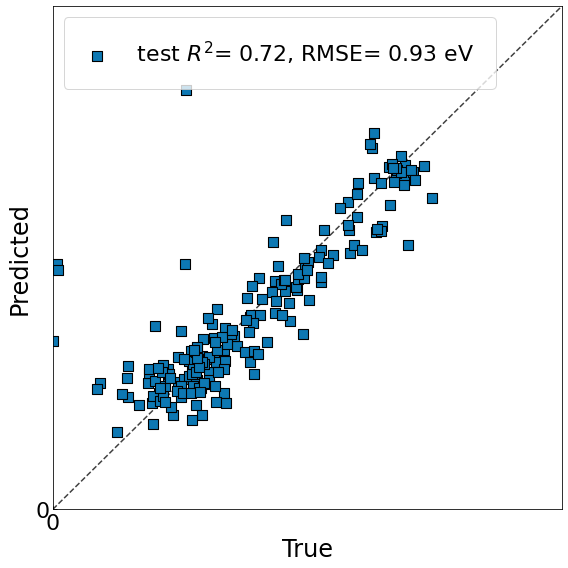

In [130]:
pp.plot(test['dft_bandgap'].tolist(),list(preds),save=False)

# Check make_splits

In [18]:
a=DataSet(df_path=df_path,other_params=other_params,nn_params=nn_params).make_splits()

{'n_core': 1, 'col_X': ['afp_Br1_C3_C3', 'afp_Br1_C4_C4', 'afp_Br1_C4_H1', 'afp_C2_C2_C2', 'afp_C2_C2_C3', 'afp_C2_C2_C4', 'afp_C2_C2_H1', 'afp_C2_C2_N3', 'afp_C2_C2_Si4', 'afp_C2_C3_C2', 'afp_C2_C3_C3', 'afp_C2_C3_H1', 'afp_C2_C3_N2', 'afp_C2_C3_N3', 'afp_C2_C3_S2', 'afp_C2_C4_C2', 'afp_C2_C4_C3', 'afp_C2_C4_C4', 'afp_C2_C4_Cl1', 'afp_C2_C4_F1', 'afp_C2_C4_H1', 'afp_C2_C4_O2', 'afp_C2_C4_S2', 'afp_C2_N3_C3', 'afp_C2_Si4_C4', 'afp_C3_C2_N1', 'afp_C3_C3_C3', 'afp_C3_C3_C4', 'afp_C3_C3_Cl1', 'afp_C3_C3_F1', 'afp_C3_C3_H1', 'afp_C3_C3_N2', 'afp_C3_C3_N3', 'afp_C3_C3_O1', 'afp_C3_C3_O2', 'afp_C3_C3_P4', 'afp_C3_C3_S1', 'afp_C3_C3_S2', 'afp_C3_C3_S4', 'afp_C3_C3_Si4', 'afp_C3_C4_C3', 'afp_C3_C4_C4', 'afp_C3_C4_Cl1', 'afp_C3_C4_F1', 'afp_C3_C4_H1', 'afp_C3_C4_N3', 'afp_C3_C4_N4', 'afp_C3_C4_O2', 'afp_C3_C4_S2', 'afp_C3_N2_C3', 'afp_C3_N2_C4', 'afp_C3_N2_N2', 'afp_C3_N2_N3', 'afp_C3_N3_C3', 'afp_C3_N3_C4', 'afp_C3_N3_H1', 'afp_C3_N3_N2', 'afp_C3_N3_N3', 'afp_C3_N3_O1', 'afp_C3_N3_O2', 'afp_C3

In [21]:
for ind,i in enumerate(a):
    exec('a_%s=i'%ind)

In [23]:
a_9

(<tf.Tensor: shape=(1785, 605), dtype=float32, numpy=
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.0625    ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.36527777],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.14421874],
        ...,
        [0.1025641 , 0.        , 0.        , ..., 0.        , 0.12820514,
         0.5600641 ],
        [0.07843138, 0.        , 0.        , ..., 0.03921569, 0.07843138,
         0.49539214],
        [0.07692308, 0.        , 0.        , ..., 0.03846154, 0.07692308,
         0.56793267]], dtype=float32)>,
 <tf.Tensor: shape=(1785, 1), dtype=float32, numpy=
 array([[5.2025],
        [6.6614],
        [7.6175],
        ...,
        [2.4917],
        [2.6114],
        [2.7192]], dtype=float32)>,
 <tf.Tensor: shape=(198, 605), dtype=float32, numpy=
 array([[0.1632653 , 0.        , 0.        , ..., 0.04081633, 0.08163265,
         0.4285204 ],